#Dataset

In [ ]:
import torch
import pandas as pd
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tqdm import tqdm
import random

In [ ]:
pip install transformers

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 27.7 MB/s eta 0:00:00


In [ ]:
pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Lable_Urdu_Final_Dataset.xlsx")

In [ ]:
df

,comment,user_name,brand,gender,label
0,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Muhammad Ahmed,Dell,Male,1
1,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,Fatima Ali,HP,Female,1
2,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Ali Hassan,Lenovo,Male,1
3,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Aisha Khan,Apple,Female,1
4,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Usman Malik,Asus,Male,1
...,...,...,...,...,...
3772,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,dhairya agarwal,Apple,Male,2
3773,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,Gaso Meter,NEC,Male,2
3774,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Piyush Kumar Jha,Asus,Male,2
3775,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Salma,Samsung,Female,2


In [ ]:
column_to_move = df['comment']
df.drop('comment', axis=1, inplace=True)
df.insert(1, 'comment', column_to_move)
df

,user_name,comment,brand,gender,label
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1
...,...,...,...,...,...
3772,dhairya agarwal,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,Apple,Male,2
3773,Gaso Meter,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,NEC,Male,2
3774,Piyush Kumar Jha,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Asus,Male,2
3775,Salma,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Samsung,Female,2


In [ ]:
df = df.dropna(subset=["comment"]).replace(["NaN", ""], float("nan")).dropna(subset=["brand"])
df = df.dropna(subset=["gender"]).replace(["NaN", ""], float("nan")).dropna(subset=["gender"])
df = df.dropna(subset=["label"]).replace(["NaN", ""], float("nan")).dropna(subset=["label"])

df['gender'] = df['gender'].replace('male', 'Male')
df['gender'] = df['gender'].replace('fmale', 'Female')
df

,user_name,comment,brand,gender,label
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1
...,...,...,...,...,...
3772,dhairya agarwal,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,Apple,Male,2
3773,Gaso Meter,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,NEC,Male,2
3774,Piyush Kumar Jha,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Asus,Male,2
3775,Salma,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Samsung,Female,2


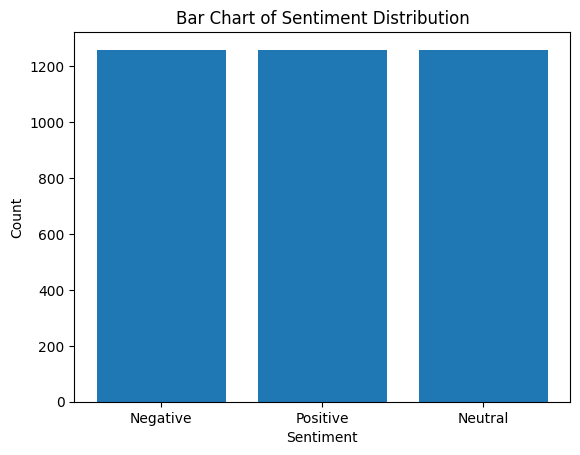

In [ ]:
import matplotlib.pyplot as plt

label_0_data = df[df["label"] == 0]
label_1_data = df[df["label"] == 1]
label_2_data = df[df["label"] == 2]

label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)

labels = ['Negative', 'Positive', 'Neutral']
sizes = [label_0_size, label_1_size, label_2_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
X_users = df['user_name'].values.reshape(-1, 1)
X_comments = df['comment'].values.reshape(-1, 1)
X_brands = df['brand'].values.reshape(-1, 1)
X_gender = df['gender'].values.reshape(-1, 1)
gender_encoder = LabelEncoder()
X_gender_encoded = gender_encoder.fit_transform(X_gender)

y = df['label']
class_counts = y.value_counts()
print("Class distribution before balancing:")
print(class_counts)
target_size = max(class_counts)
X_features = pd.concat([
    pd.DataFrame(X_users, columns=['user_name']),
    pd.DataFrame(X_comments, columns=['comment']),
    pd.DataFrame(X_brands, columns=['brand']),
    pd.DataFrame(X_gender_encoded, columns=['gender'])
], axis=1)

oversampler = RandomOverSampler(sampling_strategy={0: target_size, 1: target_size, 2: target_size})
X_balanced, y_balanced = oversampler.fit_resample(X_features, y)

balanced_class_counts = y_balanced.value_counts()
print("\nClass distribution after balancing:")
print(balanced_class_counts)

X_balanced['gender'] = gender_encoder.inverse_transform(X_balanced['gender'])

df = pd.concat([X_balanced, y_balanced], axis=1)


Class distribution before balancing:
label
1    1259
2    1259
0    1259
Name: count, dtype: int64

Class distribution after balancing:
label
1    1259
2    1259
0    1259
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


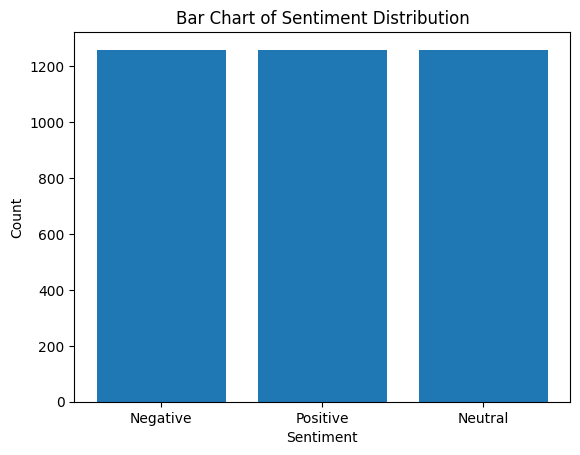

In [ ]:
import matplotlib.pyplot as plt

label_0_data = df[df["label"] == 0]
label_1_data = df[df["label"] == 1]
label_2_data = df[df["label"] == 2]

label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)

labels = ['Negative', 'Positive', 'Neutral']
sizes = [label_0_size, label_1_size, label_2_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()



In [ ]:
import string
import re

def remove_punctuations(text):
    pattern = r'[^\w\s۰-۹آ-ی]'
    text = re.sub(pattern, '', text)
    return text
df['comment_persian'] = df['comment'].apply(remove_punctuations)

In [ ]:
import re

def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]|_+', '', text)
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)
    cleaned_text = re.sub(r'youtube\S+', '', cleaned_text)
    cleaned_text = re.sub(r'[(){}\[\]]', '', cleaned_text)
    cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
    return cleaned_text
df['comment_persian'] = df['comment'].apply(clean_text)


In [ ]:
import pandas as pd
import demoji
import re
demoji.download_codes()

def remove_emojis_and_urls(text):
    text_without_emojis = demoji.replace(text, '')
    text_without_urls = re.sub(r'http\S+', '', text_without_emojis)

    return text_without_urls
df['comment']= df['comment'].apply(remove_emojis_and_urls)


<ipython-input-21-ceefcbed2be5>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
df

,user_name,comment,brand,gender,label,comment_persian
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...
...,...,...,...,...,...,...
3772,dhairya agarwal,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,Apple,Male,2,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...
3773,Gaso Meter,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,NEC,Male,2,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...
3774,Piyush Kumar Jha,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Asus,Male,2,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...
3775,Salma,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Samsung,Female,2,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟


# Create a 85-15 train-test split.



In [ ]:
import numpy as np
df_train, df_test = np.split(df.sample(frac=1, random_state=4040), [int(.60*len(df))])
print('{:>5,} training samples'.format(len(df_train)))
print('{:>5,} test samples'.format(len(df_test)))

2,266 training samples
1,511 test samples


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
df_train['label'] = df_train['label'].replace(['Negative', 'Positive', 'Neutral'], [0, 1, 2])
df_train = df_train.reset_index(drop=True)
comments_a = df_train['comment'].tolist()
labels = df_train['label'].tolist()
num_labels = len(df_train['label'].unique())
print(df_train.shape)
df

(2266, 6)


,user_name,comment,brand,gender,label,comment_persian
0,Muhammad Ahmed,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...,Dell,Male,1,میں نے حال ہی میں ایک ڈیل لیپ ٹاپ خریدا تھا ، ...
1,Fatima Ali,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...,HP,Female,1,میں برسوں سے ایک hp لیپ ٹاپ استعمال کر رہا ہوں...
2,Ali Hassan,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...,Lenovo,Male,1,لینووو لیپ ٹاپ لاجواب ہیں۔کی بورڈ ٹائپ کرنے می...
3,Aisha Khan,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...,Apple,Female,1,ایپل میک بوکس وہاں کے بہترین لیپ ٹاپ ہیں۔ڈیزائ...
4,Usman Malik,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...,Asus,Male,1,میں asus لیپ ٹاپ کا بہت بڑا پرستار ہوں۔وہ طاقت...
...,...,...,...,...,...,...
3772,dhairya agarwal,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...,Apple,Male,2,جناب میں گیم اینڈروئیڈ گیم ڈویلپمنٹ کے لئے میک...
3773,Gaso Meter,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...,NEC,Male,2,ماؤس سیریل 2 پورٹ سے منسلک تھا۔میرے پاس A &#39...
3774,Piyush Kumar Jha,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...,Asus,Male,2,جناب ASUS vivobook پرو 15 OLED کے بارے میں کیا...
3775,Salma,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟,Samsung,Female,2,Samsung لیپ ٹاپ برانڈ کی قیمت کیسی ہوتی ہے؟


#Using Colab GPU for Training

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


#Treparing test data

In [ ]:
from transformers import AutoTokenizer
# Using Pars-BERT Tokenizer
tokenizer = AutoTokenizer.from_pretrained("urduhack/roberta-urdu-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/516 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

##Encoding the data

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer


# Prepare lists to store encoded inputs
input_ids = []
attention_masks = []
token_type_ids = []

for comment in df['comment']:
    encoded_dict = tokenizer.encode_plus(
        comment,                   # Sentence to encode
        truncation=True,
        add_special_tokens=True,   # Add '[CLS]' and '[SEP]' tokens
        max_length=270,            # Pad & truncate all sentences
        padding='max_length',
        return_attention_mask=True, # Construct attention masks
        return_tensors='pt',       # Return PyTorch tensors
        return_token_type_ids=True,
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
    token_type_ids.append(encoded_dict['token_type_ids'])

# Convert lists to tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
token_type_ids = torch.cat(token_type_ids, dim=0)

# Convert labels to tensor
labels = torch.tensor(df['label'].values)

# Print sample outputs
print('Token IDs:', input_ids[0])
print('Token Type IDs:', token_type_ids[0])
print('Token Attention Mask:', attention_masks[0])
print('Labels:', labels)


Token IDs: tensor([    0,   566,   330,   902,   512,   304,   409,  5107,  8530,  4848,
        11125,   445,   328,   318,   304,   340,   289,   559, 21479,   326,
         1633,  6398,   677,  1842,   491,  2197,   328,  1884,  2576,   328,
          318,  8536,   289,  1209,  2439,  1437,   316,  1842,     2,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to integers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Convert labels to tensor
labels = torch.tensor(df['label'].values)


In [ ]:
print(f'Input IDs shape: {input_ids.shape}')
print(f'Attention Masks shape: {attention_masks.shape}')
print(f'Token Type IDs shape: {token_type_ids.shape}')
print(f'Labels shape: {labels.shape}')


Input IDs shape: torch.Size([3777, 270])
Attention Masks shape: torch.Size([3777, 270])
Token Type IDs shape: torch.Size([3777, 270])
Labels shape: torch.Size([3777])


##Import the BERT model

In [ ]:

from transformers import AutoModelForSequenceClassification, AutoConfig, AdamW
num_classes = 3

# Using Pars-BERT model
model = AutoModelForSequenceClassification.from_pretrained(
    "urduhack/roberta-urdu-small",
    num_labels=num_classes,
    output_attentions=False,
    output_hidden_states=False,
    hidden_dropout_prob=0.1,
)
config = AutoConfig.from_pretrained("urduhack/roberta-urdu-small")
if device.type == 'cuda':
  model.cuda()


pytorch_model.bin:   0%|          | 0.00/507M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at urduhack/roberta-urdu-small and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Combine the training inputs into a TensorDataset

In [ ]:
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(input_ids, token_type_ids, attention_masks, labels)
print('{:>5,} training samples'.format(len(train_dataset)))

3,777 training samples


In [ ]:
labels

tensor([1, 1, 1,  ..., 2, 2, 2])

##Create dataloaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 16
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

##Create Optimizer, Scheduler, Accuracy, Elapsed time

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )
from transformers import get_linear_schedule_with_warmup
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

##Training loop

In [ ]:
seed_val = 2020

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
training_stats = []

total_t0 = time.time()
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        b_input_ids = batch[0].to(device)
        b_token_type_ids =  batch[1].to(device)
        b_input_mask = batch[2].to(device)
        b_labels = batch[3].to(device)
        model.zero_grad()
        outputs = model(b_input_ids,
                        token_type_ids=b_token_type_ids,
                        attention_mask=b_input_mask,
                        labels=b_labels)
        loss, logits = outputs.loss, outputs.logits
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 10 ========
Training...
  Batch    40  of    237.    Elapsed: 0:00:29.
  Batch    80  of    237.    Elapsed: 0:00:57.
  Batch   120  of    237.    Elapsed: 0:01:27.
  Batch   160  of    237.    Elapsed: 0:01:58.
  Batch   200  of    237.    Elapsed: 0:02:28.

  Average training loss: 0.36
  Training epcoh took: 0:02:55

======== Epoch 2 / 10 ========
Training...
  Batch    40  of    237.    Elapsed: 0:00:30.
  Batch    80  of    237.    Elapsed: 0:01:00.
  Batch   120  of    237.    Elapsed: 0:01:30.
  Batch   160  of    237.    Elapsed: 0:02:00.
  Batch   200  of    237.    Elapsed: 0:02:30.

  Average training loss: 0.16
  Training epcoh took: 0:02:57

======== Epoch 3 / 10 ========
Training...
  Batch    40  of    237.    Elapsed: 0:00:30.
  Batch    80  of    237.    Elapsed: 0:01:00.
  Batch   120  of    237.    Elapsed: 0:01:30.
  Batch   160  of    237.    Elapsed: 0:02:00.
  Batch   200  of    237.    Elapsed: 0:02:30.

  Average training loss: 0.08
  Traini

# Preparing test data

In [ ]:
df_test['label'] = df_test['label'].replace(['Negative', 'Positive', 'Neutral'], [0, 1, 2])
df_test = df_test.reset_index(drop=True)
comments_a = df_test['comment'].tolist()
labels = df_test['label'].tolist()
num_labels = len(df_test['label'].unique())
print(df_test.shape)
df_test.head(5)

(1511, 6)


,user_name,comment,brand,gender,label,comment_persian
0,Paul Umukoro,کیا میں اسے پروگرامنگ کے لئے استعمال کرسکتا ہوں؟,Asus,Male,2,کیا میں اسے پروگرامنگ کے لئے استعمال کرسکتا ہوں؟
1,Jenny Fisher,مجھے ابھی ایک کروم بوک ملا ہے اور میں اسے پسند...,Asus,Female,1,مجھے ابھی ایک کروم بوک ملا ہے اور میں اسے پسند...
2,Saqib Mahmood,ایپل میک بوکس میں ناقابل یقین تعمیر کا معیار ہ...,Apple,Male,1,ایپل میک بوکس میں ناقابل یقین تعمیر کا معیار ہ...
3,Ruqayya,کیا یہ Apple لیپ ٹاپ برانڈ کی قیمت مناسب ہوتی ہے؟,Apple,Female,2,کیا یہ Apple لیپ ٹاپ برانڈ کی قیمت مناسب ہوتی ہے؟
4,AYAN SAHA,آنر میجک بوک 15 کے بارے میں کیا خیال ہے؟,Honor,Male,2,آنر میجک بوک 15 کے بارے میں کیا خیال ہے؟


In [ ]:
input_ids = []
attention_masks = []
token_type_ids = []
for comment_a in comments_a:
    encoded_dict = tokenizer.encode_plus(
        comment_a,                   # Sentence to encode.
        truncation=True,
        add_special_tokens=True,     # Add '[CLS]' and '[SEP]'
        max_length=270,              # Pad & truncate all sentences.
        padding='max_length',
        return_attention_mask=True,  # Construct attention masks.
        return_tensors='pt',         # Return PyTorch tensors.
        return_token_type_ids=True,
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
    token_type_ids.append(encoded_dict['token_type_ids'])
input_ids = torch.cat(input_ids, dim=0)
token_type_ids = torch.cat(token_type_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)
print('comment_a: ', comments_a[0])
print('Token IDs:', input_ids[0])
print('Token Type IDs:', token_type_ids[0])
print('Token Attention Mask:', attention_masks[0])

comment_a:  کیا میں اسے پروگرامنگ کے لئے استعمال کرسکتا ہوں؟
Token IDs: tensor([    0,  2162,   304,   933, 38657,   292,   546,   912,   309, 17082,
          677, 32636,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,

In [ ]:
test_dataset = TensorDataset(input_ids, token_type_ids, attention_masks, labels)
print('{:>5,} test samples'.format(len(test_dataset)))
batch_size = 16
prediction_data = test_dataset
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

1,511 test samples


#Model Evaluation on Test Data

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_data)))
model.eval()
predictions , true_labels = [], []
total_eval_accuracy=0

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_token_type, b_input_mask, b_labels = batch
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids= b_token_type,
                      attention_mask=b_input_mask)
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  predictions.append(logits)
  true_labels.append(label_ids)
  total_eval_accuracy += flat_accuracy(logits, label_ids)
avg_val_accuracy = total_eval_accuracy / len(prediction_dataloader)
print("  Accuracy: {0:.3f}".format(avg_val_accuracy))

Predicting labels for 1,511 test sentences...
  Accuracy: 0.999


In [ ]:
from sklearn import metrics
preds = [j for i in predictions for j in i]
preds_flat = np.argmax(preds, axis=1).flatten()
labels = [j for i in true_labels for j in i]
f1_score_micro = metrics.f1_score(labels, preds_flat, average='macro')
print("  f1_score: {0:.3f}".format(f1_score_micro))

  f1_score: 0.999


In [ ]:
from sklearn.metrics import precision_score, recall_score
preds = [j for i in predictions for j in i]
preds_flat = np.argmax(preds, axis=1).flatten()
labels = [j for i in true_labels for j in i]
precision = precision_score(labels, preds_flat, average='macro')
recall = recall_score(labels, preds_flat, average='macro')
print("  Precision: {0:.3f}".format(precision))
print("  Recall: {0:.3f}".format(recall))

  Precision: 0.999
  Recall: 0.999


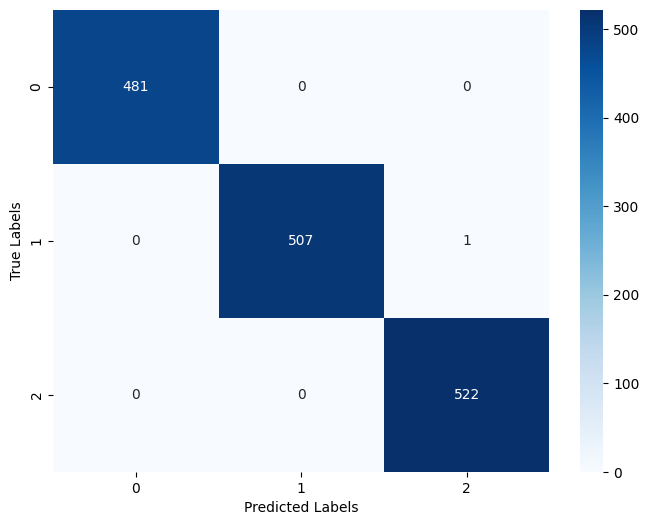

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
preds = [j for i in predictions for j in i]
preds_flat = np.argmax(preds, axis=1).flatten()
labels = [j for i in true_labels for j in i]
conf_matrix = confusion_matrix(labels, preds_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

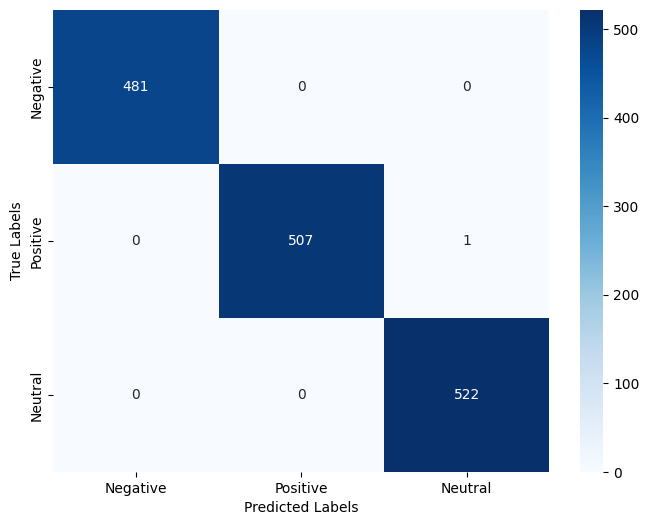

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
# Class labels
class_labels = ['Negative', 'Positive', 'Neutral']

preds = [j for i in predictions for j in i]
preds_flat = np.argmax(preds, axis=1).flatten()
labels = [j for i in true_labels for j in i]


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
pip install Lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e4de840ac64ea8e9768c001b79f887319aa91467ba34dd6561084a41d9c19f2e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built Lime


In [ ]:
import transformers

In [ ]:
pred = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=0,
    return_all_scores=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
shap_values = explainer(df["comment_persian"][:3])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [00:15<00:00,  2.85s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [00:23,  7.71s/it]


In [ ]:
shap.plots.text(shap_values)

This cell output is too large and can only be displayed while logged in.


In [ ]:
shap.plots.text(shap_values[:, :, "LABEL_0"])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


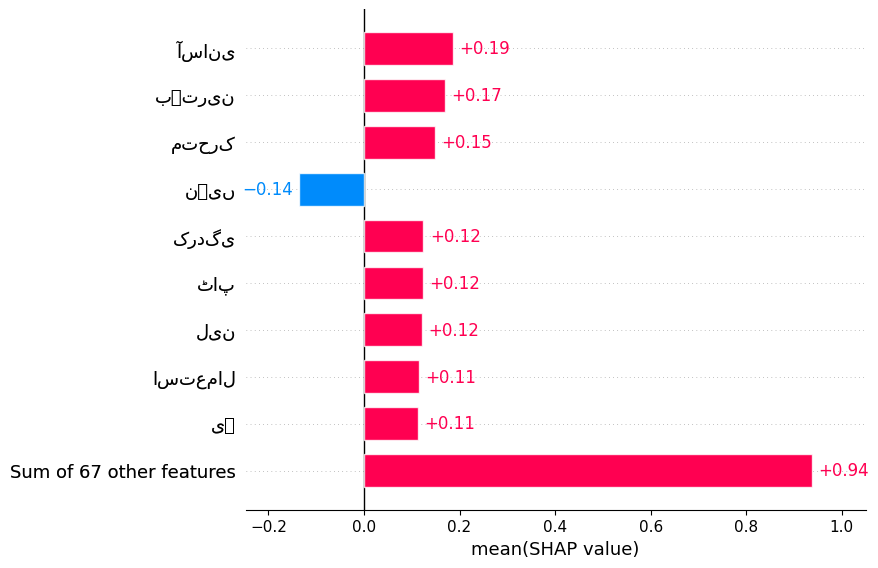

In [ ]:
shap.plots.bar(shap_values[:, :, "LABEL_1"].mean(0))

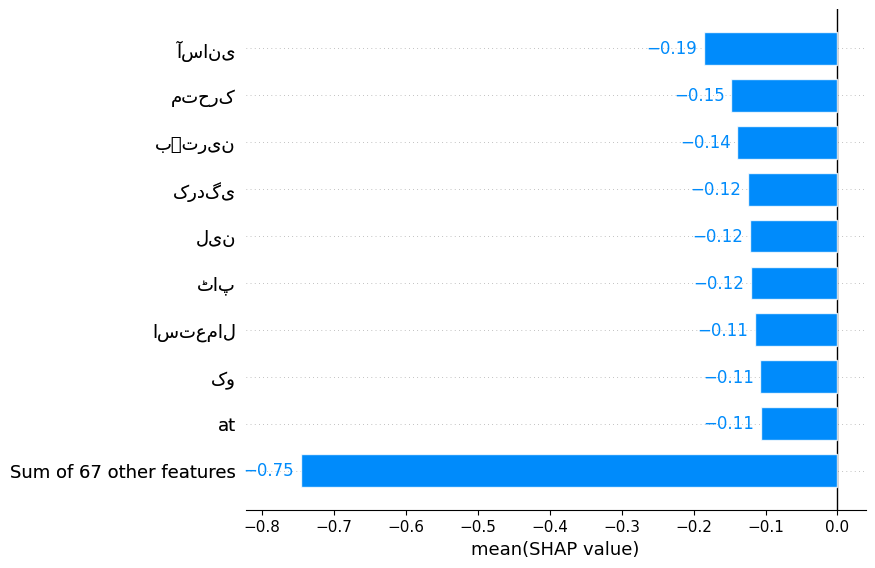

In [ ]:
# we can sort the bar chart in decending order
shap.plots.bar(shap_values[:, :, "LABEL_2"].mean(0), order=shap.Explanation.argsort)

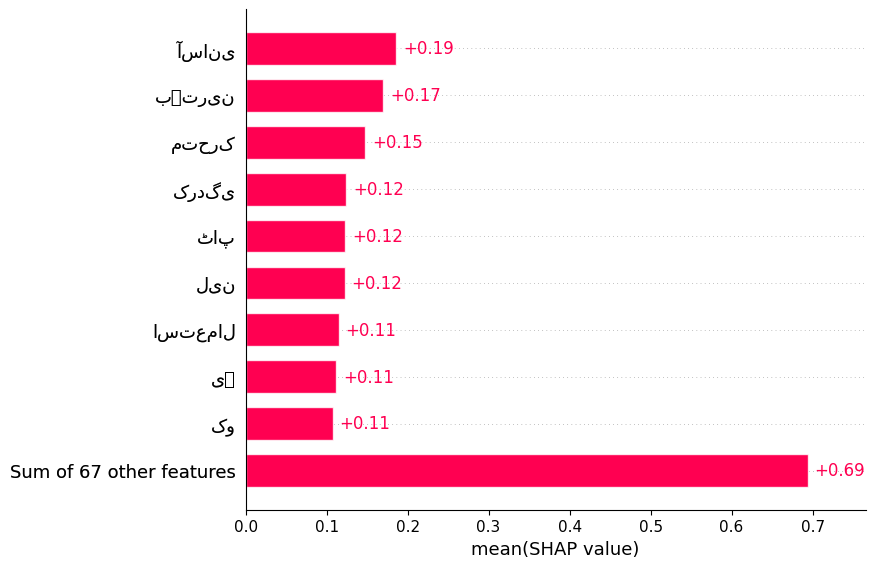

In [ ]:
# ...or acending order
shap.plots.bar(shap_values[:, :, "LABEL_1"].mean(0), order=shap.Explanation.argsort.flip)

In [ ]:
logit_explainer = shap.Explainer(shap.models.TransformersPipeline(pred, rescale_to_logits=True))

logit_shap_values = logit_explainer(df["comment_persian"][:3])
shap.plots.text(logit_shap_values)

This cell output is too large and can only be displayed while logged in.
